# **TASK 4 - EMAIL SPAM DETECTION WITH MACHINE LEARNING**
---
Author - **ANIRUDDH NAIR**

# Importing **Libraries**

In [1]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv("oasis_emailspamdetection.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.tail()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
import numpy as np
df['Count']=0
for i in np.arange(0,len(df.v2)):
    df.loc[i,'Count'] = len(df.loc[i,'v2'])

In [8]:
df.head()

,v1,v2,Count
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
df['v1'].value_counts()


ham     4825
spam     747
Name: v1, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
 2   Count   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [11]:
cor = []
ps = PorterStemmer()

In [12]:
corpus = []
ps = PorterStemmer()

In [13]:
print (df['v2'][2])
print (df['v2'][3])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...


## **2. Exploratory Data Analysis**

In [14]:
df.groupby('v1').describe()


Count                                                         
       count        mean        std   min    25%    50%    75%    max
v1                                                                   
ham   4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam   747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [15]:
df.rename(columns={'v1':'label','v2':'sms'},inplace=True)

In [16]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [17]:
df.sms.value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [18]:
df.groupby('sms').describe()

Count                    \
                                                   count   mean std    min   
sms                                                                          
 &lt;#&gt;  in mca. But not conform.                 1.0   36.0 NaN   36.0   
 &lt;#&gt;  mins but i had to stop somewhere fi...   1.0   51.0 NaN   51.0   
 &lt;DECIMAL&gt; m but its not a common car her...   1.0  132.0 NaN  132.0   
 and  picking them up from various points            1.0   41.0 NaN   41.0   
 came to look at the flat, seems ok, in his 50s...   1.0  103.0 NaN  103.0   
...                                                  ...    ...  ..    ...   
ÌÏ still got lessons?  ÌÏ in sch?                    1.0   33.0 NaN   33.0   
ÌÏ takin linear algebra today?                       1.0   30.0 NaN   30.0   
ÌÏ thk of wat to eat tonight.                        1.0   29.0 NaN   29.0   
ÌÏ v ma fan...                                       1.0   14.0 NaN   14.0   
ÌÏ wait 4 me in sch i finish ard 5..                 1.0   36.0 NaN   36.0   

                                                                                
                                                      25%    50%    75%    max  
sms                                                                             
 &lt;#&gt;  in mca. But not conform.                 36.0   36.0   36.0   36.0  
 &lt;#&gt;  mins but i had to stop somewhere fi...   51.0   51.0   51.0   51.0  
 &lt;DECIMAL&gt; m but its not a common car her...  132.0  132.0  132.0  132.0  
 and  picking them up from various points            41.0   41.0   41.0   41.0  
 came to look at the flat, seems ok, in his 50s...  103.0  103.0  103.0  103.0  
...                                                   ...    ...    ...    ...  
ÌÏ still got lessons?  ÌÏ in sch?                    33.0   33.0   33.0   33.0  
ÌÏ takin linear algebra today?                       30.0   30.0   30.0   30.0  
ÌÏ thk of wat to eat tonight.                        29.0   29.0   29.0   29.0  
ÌÏ v ma fan...                                       14.0   14.0   14.0   14.0  
ÌÏ wait 4 me in sch i finish ard 5..                 36.0   36.0   36.0   36.0  

[5169 rows x 8 columns]

In [19]:
df.groupby('label').describe()

Count                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [20]:
df.rename(columns={'v1':'label','v2':'sms'},inplace=True)

In [21]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [22]:
df['sms length'] = df['sms'].apply(len)
df.head()

,label,sms,Count,sms length
0,ham,"Go until jurong point, crazy.. Available only ...",111,111
1,ham,Ok lar... Joking wif u oni...,29,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,155
3,ham,U dun say so early hor... U c already then say...,49,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,61


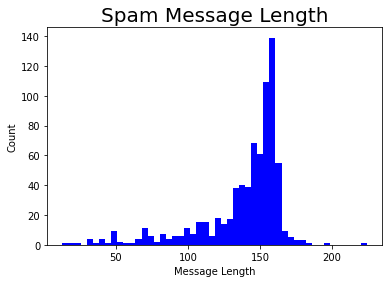

In [23]:
plt.hist(df[df['label']=='spam']['sms length'],color='blue',bins=50)
plt.title('Spam Message Length',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

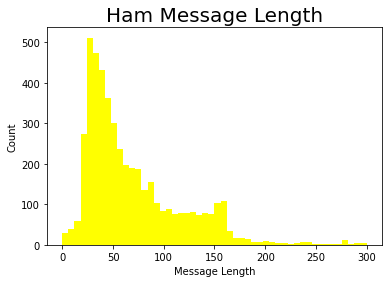

In [24]:
plt.hist(df[df['label']=='ham']['sms length'],color='yellow',bins=50,range=(0,300))
plt.title('Ham Message Length',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

## **3.Text Preprocessing**

In [25]:
import string
ps = PorterStemmer()

def process_sms(sms):
    ''' This function removes punctuations and returns the sms as a list of words'''
    sms = sms.translate(str.maketrans('','',string.punctuation)) #remove punctuations
    sms = sms.split()
    sms = [ps.stem(word) for word in sms if len(word) > 2]
    sms = ' '.join(sms)
    return sms

In [26]:
df['sms'] = df.sms.apply(process_sms)

In [ ]:
df['label'] = df.label.map({'ham':0, 'spam':1})
df.head()


In [28]:
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
df.head()

,label,sms,Count,sms length
0,0,until jurong point crazi avail onli bugi great...,111,111
1,0,lar joke wif oni,29,29
2,1,free entri wkli comp win cup final tkt 21st ma...,155,155
3,0,dun say earli hor alreadi then say,49,49
4,0,nah dont think goe usf live around here though,61,61


In [29]:
x=df['sms']
y=df['label']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(df['sms'],df['label'],test_size = 0.30, random_state =7)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [32]:
X_train_count=cv.fit_transform(X_train.values)

In [33]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **4. Model Building**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(features_train,y_train)
prediction_knn = model.predict(features_test)
print(accuracy_score(y_test,prediction_knn))
print(classification_report(y_test,prediction_knn))

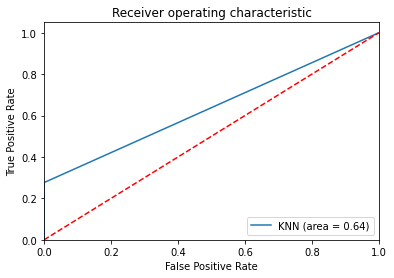

In [ ]:
knn_roc_auc = roc_auc_score(y_test,prediction_knn)
fpr, tpr, thresholds = roc_curve(y_test,prediction_knn)
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## **5. Decision Tree**

In [ ]:
model = DecisionTreeClassifier(random_state=50)
model.fit(features_train,y_train)

DecisionTreeClassifier(random_state=50)

In [ ]:
y_pred_dt = model.predict(features_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

[[1432   12]
 [  71  157]]


In [ ]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(y_test, model.predict(features_test)))
print (classification_report(y_test, model.predict(features_test)))

Accuracy : 0.95036 


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1444
           1       0.93      0.69      0.79       228

    accuracy                           0.95      1672
   macro avg       0.94      0.84      0.88      1672
weighted avg       0.95      0.95      0.95      1672



## **Final Result**

---



---

